## 탐색 : 데이터의 기초 정보 살펴보기

- country : 국가 정보
- beer_servings : beer 소비량
- spirit_servings : spirit 소비량
- wine_servings : wine 소비량
- total_litres_of_pure_alcohol : 총 알코올 소비량
- continent : 국가의 대륙 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/drinks.csv')
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 인사이트의 발견 : 탐색과 시각화하기

- 피처 간의 상관 관계를 살펴봅시다. 피처 간의 상관 관계를 통계적으로 탐색하는 방법은 크게 두 가지입니다.
- 첫 번째 방법은 피처가 2개일 때의 상관 계수를 계산하는 단순 상관 분석 방법이며, 두 번째 방법은 대상 피처가 여러 개일 때 상호 간의 연관성을 분석하는 다중 상관 분석입니다.

### 두 피처 간의 상관 계수 구하기

In [5]:
# beer_servings, wine_servings 두 피처 간의 상관 계수를 계산
# pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법

corr = data[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


- 두 피처 간의 상관 계수는 0.52 정도로 나타남

In [6]:
# 피처 간의 상관 계수 행렬 구하기

cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = data[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


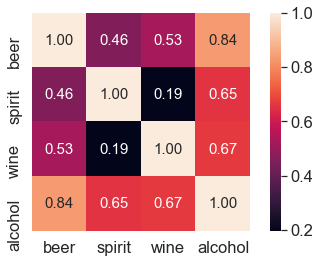

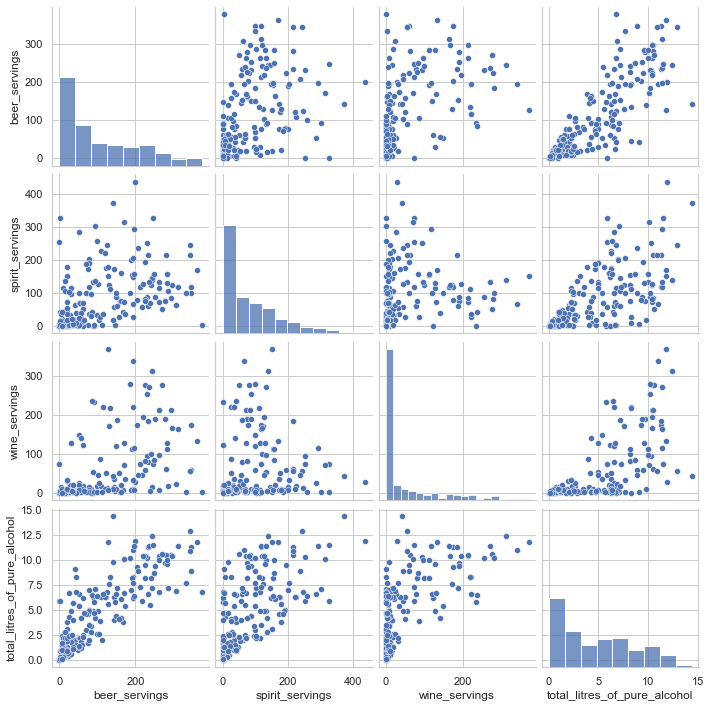

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프 출력
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(data[['beer_servings', 'spirit_servings', 'wine_servings',
                    'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

## EDA

In [9]:
# 결측 데이터 전처리하기

data['continent'] = data['continent'].fillna('OT')
data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


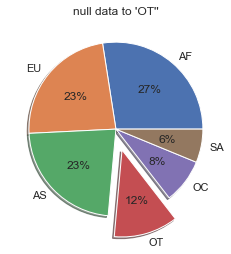

In [10]:
# 파이차트로 시각화하기

labels = data['continent'].value_counts().index.tolist()
fracs1 = data['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode = explode, labels = labels, autopct = '%.0f%%', shadow = True)
plt.title("null data to \'OT'\'")
plt.show()

### 대륙별 spirit_servings의 통계적 정보

In [11]:
result = data.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 전체 평균보다 많은 알코올을 섭취하는 대륙은 어디일까?

In [12]:
total_mean = data['total_litres_of_pure_alcohol'].mean()
continent_mean = data.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


### 평균 beer_servings가 가장 높은 대륙은 어디일까?

In [13]:
beer_continent = data.groupby('continent')['beer_servings'].mean().idxmax()
print(beer_continent)

EU


### 시각화

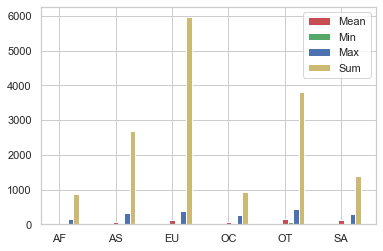

In [14]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

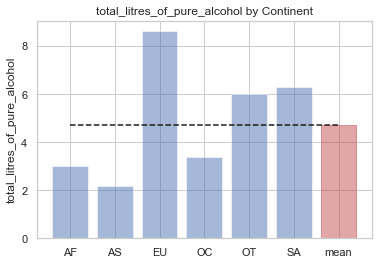

In [15]:
# 대륙별 total_litres_of_pure_alcohol을 시각화

continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

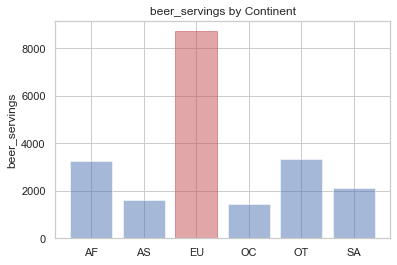

In [16]:
# 대륙별 beer_servings를 시각화

beer_group = data.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index('EU')].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

## 통계적 분석 : 분석 대상 간의 통계적 차이 검정하기

In [17]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

africa = data.loc[data['continent'] == 'AF']
europe = data.loc[data['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False)

print('The t-statistic and p-value assuming equal variances is %.3f and %.3f.' % tTestResult)
print('The t-statistic and p-value not assuming equal variances is %.3f and %.3f' % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


- 실행 결과에 등장하는 t-statistic은 t-test의 검정 통계량을 의마하는 것으로, 함께 출력되는 p-value와 연관 지어 해석해야 함.
- p-value는 가설이 얼마나 믿을만한 것인지를 나타내는 지표로, 데이터를 새로 샘플링했을 때 귀무 가설이 맞다는 전제 하에 현재 나온 통계값 이상이 나올 확률이라고 정의할 수 있음
- 만약 p-value가 너무 낮으면 귀무 가설이 일어날 확률이 너무 낮기 때문에 귀무 가설을 기각하게 됨.
- 보통 그 기준은 0.05나 0.01을 기준으로 하며, 이를 p-value(유의확률)이라고 함.
- 위의 실행 결과에서는 등분산을 가정한 케이스와 가정하지 않은 케이스 모두 p-value가 0.000 이하로 나타남. t-test의 귀무 가설은 '두 집단의 평균이 같다'이고 이 귀무 가설은 기각됨.
- 따라서 '아프리카와 유럽 대륙 간의 맥주 소비량 차이'는 통계적으로 유의미하다는 결론을 내릴 수 있음.
- 이는 대립 가설인 '두 집단의 평균이 다르다'를 채택하는 것임.

### 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [18]:
data['total_servings'] = data['beer_servings'] + data['wine_servings'] + data['spirit_servings']

data['alcohol_rate'] = data['total_litres_of_pure_alcohol'] / data['total_servings']
data['alcohol_rate'] = data['alcohol_rate'].fillna(0)

country_with_rank = data[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending = False)
country_with_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


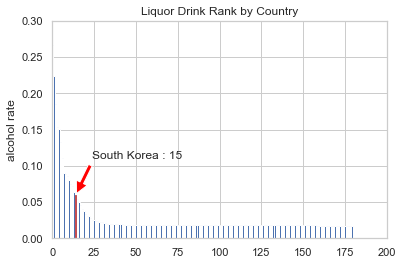

In [19]:
# 국가별 순위 정보 시각화

country_list = country_with_rank['country'].tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank['alcohol_rate'].tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('Liquor Drink Rank by Country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index('South Korea')
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
            xy = (korea_rank, korea_alc_rate),
            xytext = (korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops = dict(facecolor = 'red', shrink = 0.05))

plt.show()